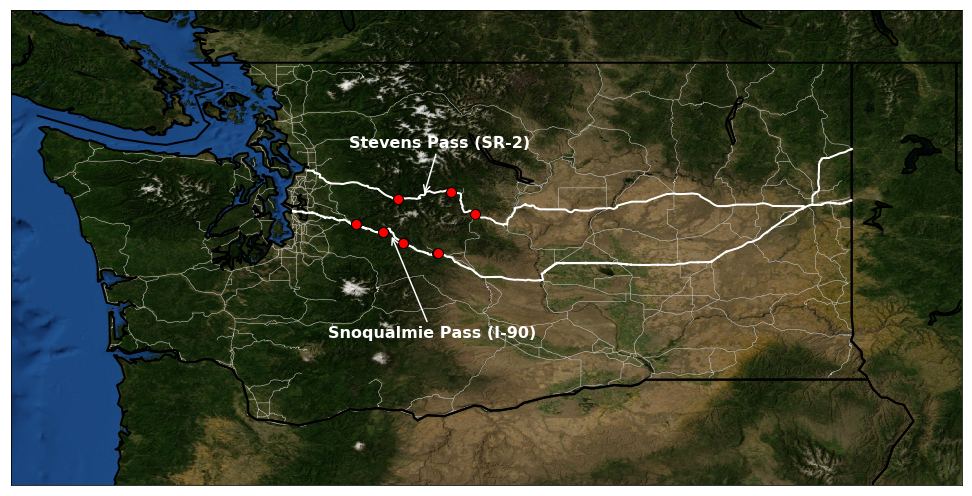

In [1]:
# Create basemap showing data

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pyproj
import geopandas as gpd
import pandas as pd
import numpy as np

roadshpfile = 'traffic_data/sr24kDecrease_20161231'
roadshp = gpd.read_file(roadshpfile+'.shp')
tmp = roadshp.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
tmp.to_file(roadshpfile+'_wgs84.shp', driver='ESRI Shapefile')

plt.figure(figsize=(14, 7))

# Plot background image
map = Basemap(llcrnrlon=-125,llcrnrlat=45,urcrnrlon=-116,urcrnrlat=49.5,resolution='i')
map.arcgisimage(service='ESRI_Imagery_World_2D',xpixels=2000)

# Plot roads
roads_info = map.readshapefile(roadshpfile+'_wgs84','roads',linewidth=0.5,color='0.8')
for info, coords in zip(map.roads_info,map.roads):
    if (info['StateRoute']=='090') or (info['StateRoute']=='002'):
        x, y = zip(*coords)
        map.plot(x,y,'w',linewidth=2)

# Plot borders
map.drawcoastlines(linewidth=2)
map.drawstates(linewidth=2)
map.drawcountries(linewidth=2)
        
# Plot traffic sites
traffic_sites = ['S901','R039W','S903','B04','R038','R058E','R047WW']
traffic_locs = []
for site in traffic_sites:
    traffic_locs.append(pd.read_csv('traffic_data/TrafficVolumeByHour_'+site+\
            '_2007-01_2017-12.csv').SiteLocation.unique())
mileposts_info = map.readshapefile('traffic_data/SRMilepostMarkers','mileposts',linewidth=0)

for loc in traffic_locs:
    p = str(loc).split()
    for info, coords in zip(map.mileposts_info,map.mileposts):
        if (info['SR'] == p[2]) and (float(info['MP_VALUE']) == np.round(float(p[5]))):
            plt.plot(coords[0],coords[1],'ko',markerfacecolor='r',markersize=10)

# Label passes
plt.annotate('Snoqualmie Pass (I-90)',xy=(-121.4001,47.3723),xytext=(-122,46.4),\
             fontsize=16,xycoords='data',textcoords='data',\
             arrowprops=dict(arrowstyle="->",color='w',linewidth=1.5),color='w',fontweight='bold')
plt.annotate('Stevens Pass (SR-2)',xy=(-121.0890,47.7448),xytext=(-121.8,48.2),\
             fontsize=16,xycoords='data',textcoords='data',\
             arrowprops=dict(arrowstyle="->",color='w',linewidth=1.5),color='w',fontweight='bold')

plt.tight_layout()
plt.savefig('figures/WA_state_map.pdf',dpi=400,transparent=True)
